<a href="https://colab.research.google.com/github/insooAI/TNT_2021_winter_team_1/blob/main/3%EC%A3%BC%EC%B0%A8_%EA%B9%80%EC%9D%B8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [159]:
# 오분류율 함수
def misc_rate(test,pred):
    return 1 - accuracy_score(test,pred)

# 1번 문제

In [37]:
train = pd.read_csv('/content/drive/My Drive/데이터/3주차/heart attack train.csv')
test = pd.read_csv('/content/drive/My Drive/데이터/3주차/heart attack test.csv')

In [38]:
train = train.drop('Unnamed: 0',1)
test = test.drop('Unnamed: 0',1)

## EDA

In [ ]:
print(train.shape)
print(test.shape)

(242, 14)
(61, 14)


In [ ]:
# 형태 파악 & 결측치 파악 (zero)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
 13  target    242 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.6 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     int64  
 1   sex       61 non-null     int64  
 2   cp        61 non-null     int64  
 3   trestbps  61 non-null     int64  
 4   chol      61 non-null     int64  
 5   fbs       61 non-null     int64  
 6   restecg   61 non-null     int64  
 7   thalach   61 non-null     int64  
 8   exang     61 non-null     int64  
 9   oldpeak   61 non-null     float64
 10  slope     61 non-null     int64  
 11  ca        61 non-null     int64  
 12  thal      61 non-null     int64  
 13  target    61 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 6.8 KB


In [ ]:
# label 분포 파악
# 그렇게 imbalanced 되어있지는 않음
train['target'].value_counts()

1    134
0    108
Name: target, dtype: int64

In [ ]:
# test['target'].value_counts()

1    31
0    30
Name: target, dtype: int64

## Data Preprocessing (version 1)
- 범주형 변수 처리 X

In [39]:
alldata = pd.concat([train,test])
alldata.shape

(303, 14)

In [40]:
alldata_x = alldata.drop('target',1)
alldata_y = alldata['target']

In [41]:
# train + test data의 X 변수들 scalingb
scaler = StandardScaler()
alldata_scaled_x = scaler.fit_transform(alldata_x)
alldata_scaled_x = pd.DataFrame(alldata_scaled_x)
alldata_scaled_x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.260980,0.681005,1.973123,-0.778093,-1.164631,-0.417635,-1.005832,1.764663,-0.696631,-0.896862,-0.649113,-0.714429,-2.148873
1,1.393352,-1.468418,1.002577,1.163746,0.593988,-0.417635,0.898962,0.977514,-0.696631,-0.896862,0.976352,0.265082,-0.512922
2,0.290464,0.681005,1.002577,1.049520,-2.324160,2.394438,0.898962,1.021244,-0.696631,-0.724323,0.976352,0.265082,1.123029
3,0.290464,0.681005,0.032031,1.277972,-0.275659,-0.417635,-1.005832,0.627670,-0.696631,-0.896862,0.976352,0.265082,-0.512922
4,-0.481558,-1.468418,0.032031,-0.663867,-0.043753,-0.417635,0.898962,0.540209,-0.696631,0.052103,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
299,0.290464,0.681005,-0.938515,-1.234996,1.714865,-0.417635,0.898962,-0.290671,1.435481,1.691225,-0.649113,0.265082,1.123029
300,-1.805024,0.681005,1.973123,-0.663867,-0.294985,-0.417635,0.898962,1.414819,1.435481,2.381381,-0.649113,-0.714429,1.123029
301,0.290464,0.681005,-0.938515,1.049520,0.574662,-0.417635,-1.005832,-1.646316,1.435481,-0.379244,-0.649113,0.265082,-2.148873


In [42]:
x_train = alldata_scaled_x[:242]
x_test = alldata_scaled_x[242:]

In [ ]:
x_train.shape, x_test.shape

((242, 13), (61, 13))

In [43]:
# 1 : train_test_split 으로 시도 
# 차례로 실행해야함 .. 중복된 이름
x_train, x_valid, y_train, y_valid = train_test_split(x_train, train['target'], test_size= 0.2, random_state = 10, stratify= train['target'])

In [44]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
57,1.062485,0.681005,-0.938515,-0.663867,-0.005102,-0.417635,-1.005832,-2.346004,1.435481,1.001069,-2.274579,0.265082,-0.512922
7,1.062485,-1.468418,-0.938515,-0.092738,1.096450,-0.417635,0.898962,-1.209011,-0.696631,0.828529,-0.649113,1.244593,-0.512922
30,-0.371269,0.681005,1.973123,-0.378302,-0.642843,-0.417635,-1.005832,-1.077820,1.435481,0.310912,0.976352,0.265082,-0.512922
104,0.069886,0.681005,0.032031,-0.092738,0.304105,-0.417635,0.898962,0.234095,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
241,-0.040403,0.681005,1.002577,1.049520,-0.275659,-0.417635,-1.005832,0.671400,-0.696631,0.483451,0.976352,-0.714429,1.123029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.400752,0.681005,1.002577,0.478391,-0.681494,2.394438,-1.005832,0.671400,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
144,0.731619,0.681005,1.973123,0.135714,-0.237008,-0.417635,0.898962,-0.203210,-0.696631,1.346147,-0.649113,1.244593,-0.512922
17,0.952197,0.681005,-0.938515,-0.092738,0.149501,-0.417635,-1.005832,-0.115749,-0.696631,0.310912,-0.649113,0.265082,1.123029
234,2.165374,-1.468418,0.032031,-0.663867,0.439384,-0.417635,-1.005832,-1.252742,1.435481,-0.724323,0.976352,0.265082,-0.512922


In [ ]:
# train의 target과 비슷한 비율로
y_train.value_counts()
print('\t')
print(107/(107+86))

	
0.5544041450777202


In [ ]:
# valid의 target과 비슷한 비율로
print(y_valid.value_counts())
print('\t')
print(27/(27+22))

1    27
0    22
Name: target, dtype: int64
	
0.5510204081632653


In [ ]:
train['target'].value_counts()
# print('\t')
print(134/(134+108))

0.5537190082644629


In [45]:
# 로지스틱 모델 # 0.1이 best

alphas = [0.00001,0.001,0.01,0.1,1]
for alpha in alphas:
    lr_clf = LogisticRegression(C = alpha, random_state=10).fit(x_train, y_train)
    predict = lr_clf.predict(x_valid)
    print(f'alpha : {alpha}일 때, missclassification rate = {misc_rate(y_valid,predict)}')
    print(f'alpha : {alpha}일 때, accuracy score = {lr_clf.score(x_valid,y_valid)}') 
    # 이거 자체가 x_valid로부터 predict 뽑아서 y_valid랑 비교해서 정확도 구하는 듯
    print('\t')

# 0.1428571428571429 + 0.8571428571428571 = 1

alpha : 1e-05일 때, missclassification rate = 0.44897959183673475
alpha : 1e-05일 때, accuracy score = 0.5510204081632653
	
alpha : 0.001일 때, missclassification rate = 0.326530612244898
alpha : 0.001일 때, accuracy score = 0.673469387755102
	
alpha : 0.01일 때, missclassification rate = 0.16326530612244894
alpha : 0.01일 때, accuracy score = 0.8367346938775511
	
alpha : 0.1일 때, missclassification rate = 0.1428571428571429
alpha : 0.1일 때, accuracy score = 0.8571428571428571
	
alpha : 1일 때, missclassification rate = 0.1428571428571429
alpha : 1일 때, accuracy score = 0.8571428571428571
	


In [46]:
# 실제 test data 상에서는 alpha가 0.01일때 best인 걸 확인할 수 있음
# missclassification rate = 0.21311475409836067
# 고로 train_test_split은 train의 일부만 놓고 학습해서 평가하기 때문에 정확도 측면에서 실제 test data상과 차이가 나는 것!
# CV 필요

x_train = alldata_scaled_x[:242]
x_test = alldata_scaled_x[242:]

alphas = [0.00001,0.001,0.01,0.05,0.1,1]
for alpha in alphas:
    lr = LogisticRegression(C = alpha, random_state=10).fit(x_train, train['target'])
    target = test['target']
    # predict = lr.predict(x_test)
    # print(f'alpha : {alpha}일 때, missclassification rate = {misc_rate(target, predict)}') # 똑같음
    print(f'alpha : {alpha}일 때, missclassification rate = {1-lr.score(x_test,target)}')

alpha : 1e-05일 때, missclassification rate = 0.4918032786885246
alpha : 0.001일 때, missclassification rate = 0.29508196721311475
alpha : 0.01일 때, missclassification rate = 0.21311475409836067
alpha : 0.05일 때, missclassification rate = 0.2295081967213115
alpha : 0.1일 때, missclassification rate = 0.24590163934426235
alpha : 1일 때, missclassification rate = 0.2622950819672131


## Cross Validation

In [47]:
# l2 norm : 제곱 (로지스틱에서 default)
# l1 norm : 절댓값 

x_train = alldata_scaled_x[:242]
x_test = alldata_scaled_x[242:]

params = {'penalty' : ['l2'],
          'C' : [0.001,0.01,0.1,1]}
lr = LogisticRegression()
grid_clf = GridSearchCV(lr, param_grid= params, scoring='accuracy', cv=5)
grid_clf.fit(x_train, train['target'])
print(f' 최적 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {grid_clf.best_score_}, 오분류율 : {1 - grid_clf.best_score_}')
# 5fold 평균 정확도

 최적 파라미터 : {'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.8392857142857142, 오분류율 : 0.1607142857142858


## 결론 1 :
- train_test_split 에서도 & CV 에서도 둘다 C가 0.1 best 였으나, 실제 test data상에서는 C가 0.01일 때, best였음
- missclassification rate = 0.21311475409836067 (C = 0.01)

In [ ]:
lr = LogisticRegression(C=0.01).fit(x_train, train['target'])
lr.coef_ # log odds에 대한 베타 계수 (w) 값
# ln(odds) = ln(p(y=1)/ 1-p(y=1)) = w^t*x

array([[-0.0916168 , -0.20142041,  0.2789411 , -0.07359685, -0.04681971,
         0.00888011,  0.08233397,  0.21630057, -0.23225894, -0.19928643,
         0.13538277, -0.20600103, -0.13131835]])

## EDA 2

In [48]:
train = pd.read_csv('/content/drive/My Drive/데이터/3주차/heart attack train.csv', index_col = 0)
test = pd.read_csv('/content/drive/My Drive/데이터/3주차/heart attack test.csv', index_col = 0)
alldata = pd.concat([train,test])

## Data Preprocessing (version 2)
- 범주형 변수 처리

In [156]:
alldata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0


### info 함수

In [49]:
def info(alldata):
    colname = []
    dtype = []
    unique_value = []
    unique_count = []
    for col in alldata.columns[:-1]:
        colname.append(col)
        dtype.append(alldata[col].dtype)
        unique_value.append(alldata[col].unique())
        unique_count.append(alldata[col].nunique())
    
    info = pd.DataFrame({'colname': colname, 'dtype' : dtype, 'unique_value':unique_value, 'unique_count':unique_count})
    # df = pd.DataFrame([colname, dtype, unique_value, unique_count], index = ['colname','dtype','unique_value','unique_count']).transpose()
    # df # 리스트로 데프 만들기 # 가로로 들어가기때문에 transpose 해줘야
    return info

In [120]:
info(alldata)

,colname,dtype,unique_value,unique_count
0,age,int64,"[52, 67, 57, 50, 62, 64, 55, 65, 49, 70, 45, 4...",41
1,sex,object,"[1, 0]",2
2,cp,object,"[3, 2, 1, 0]",4
3,trestbps,int64,"[118, 152, 150, 154, 120, 115, 140, 130, 132, ...",49
4,chol,int64,"[186, 277, 126, 232, 244, 564, 268, 303, 353, ...",152
5,fbs,object,"[0, 1]",2
6,restecg,object,"[0, 1, 2]",3
7,thalach,int64,"[190, 172, 173, 164, 162, 160, 122, 132, 151, ...",91
8,exang,object,"[0, 1]",2
9,oldpeak,float64,"[0.0, 0.2, 1.1, 1.6, 3.6, 2.0, 1.2, 0.8, 2.4, ...",40


### 숫자 -> 문자 -> dummy 화 함수

In [50]:
def num_to_str(alldata):
    colname = [col for col in alldata.columns[:-1]]
    nunique = [len(alldata[col].unique()) for col in alldata.columns[:-1]]
    zipp = dict(zip(colname, nunique))   
    
    # str & dummy 화 
    for col in alldata.columns[:-1]:
        if zipp[col] < 6:
            alldata[col] = alldata[col].apply(lambda x: str(x))
    alldata = pd.get_dummies(alldata)

    return alldata

In [51]:
alldata_ = num_to_str(alldata)

In [159]:
len(train)

242

In [54]:
train2 = alldata_.iloc[train.index]
test2 = alldata_.iloc[test.index]

In [55]:
train2_x = train2.drop(['target'],1)
train2_y = train2['target']

In [56]:
test2_x = test2.drop(['target'],1)
test2_y = test2.target

## Cross Validation 2 


In [57]:
# max_iter 튜닝 더 알아봐야할듯..
params = {'C' : [0.01,0.1,1,10]}
lr = LogisticRegression(max_iter=10000)
grid_clf = GridSearchCV(lr, param_grid= params, scoring='accuracy', cv=5)
grid_clf.fit(train2_x, train2_y)
print(f' 최적 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {grid_clf.best_score_}, 오분류율 : {1 - grid_clf.best_score_}')


 최적 파라미터 : {'C': 0.1}, 최적 평균 정확도 : 0.8511054421768709, 오분류율 : 0.1488945578231291


In [63]:
alphas = [0.00001,0.001,0.01,0.05,0.1,1]
for alpha in alphas:
    lr = LogisticRegression(C = alpha, random_state=10)
    lr = lr.fit(train2_x, train2_y)
    print(f'alpha : {alpha}일 때, missclassification rate = {1 - lr.score(test2_x,test2_y)}')

alpha : 1e-05일 때, missclassification rate = 0.3114754098360656
alpha : 0.001일 때, missclassification rate = 0.21311475409836067
alpha : 0.01일 때, missclassification rate = 0.180327868852459
alpha : 0.05일 때, missclassification rate = 0.14754098360655743
alpha : 0.1일 때, missclassification rate = 0.14754098360655743
alpha : 1일 때, missclassification rate = 0.11475409836065575
alpha : 2일 때, missclassification rate = 0.21311475409836067


In [61]:
clf = LogisticRegression(C=1)
clf.fit(train2_x, train2_y)
y_pred = clf.predict(test2_x)
print("Accuracy:",metrics.accuracy_score(test2_y, y_pred))

Accuracy: 0.8852459016393442


In [60]:
metrics.confusion_matrix(test2_y, y_pred)

array([[25,  5],
       [ 2, 29]])

## 관계





In [77]:
coefficient = dict(zip(train2_x.columns.values, clf.coef_[0]))
coefficient = sorted(coefficient.items(), key=lambda x: abs(x[1]), reverse=True)

In [78]:
coefficient

[('cp_0', -1.370412018487456),
 ('ca_0', 1.2746209860620403),
 ('cp_2', 0.7869413376171129),
 ('thal_3', -0.7411645996673317),
 ('ca_2', -0.6814482846797426),
 ('thal_2', 0.6539877052747708),
 ('ca_1', -0.6188284124979728),
 ('slope_1', -0.5569994789458136),
 ('oldpeak', -0.5359286444141247),
 ('sex_1', -0.5037257188624182),
 ('sex_0', 0.4888559636219327),
 ('exang_1', -0.44972558308466704),
 ('exang_0', 0.43485582783853827),
 ('slope_2', 0.36798644915769607),
 ('cp_3', 0.3495161884509667),
 ('cp_1', 0.21908473717215235),
 ('slope_0', 0.17414327454424727),
 ('restecg_0', -0.15350545869571747),
 ('restecg_1', 0.12898889567871716),
 ('thal_1', 0.09746792339932901),
 ('ca_4', 0.09068058386997524),
 ('ca_3', -0.07989462800022937),
 ('age', 0.03346814429638689),
 ('thal_0', -0.02516078425357653),
 ('trestbps', -0.014570056561486683),
 ('thalach', 0.012491530526940206),
 ('restecg_2', 0.009646807773662367),
 ('fbs_0', -0.008945389094184615),
 ('fbs_1', -0.005924366149230953),
 ('chol', -0.00

## 결론 2 :
- 카테고리의 성격을 띠는 숫자형 변수를 문자형변수로 바꾸고, dummy화 하고나니 모델 성능이 더 좋아짐
- C : 1일 때, missclassification rate = 0.11475409836065575

# 2번 문제

In [160]:
train = pd.read_csv('/content/drive/My Drive/데이터/3주차/satisfaction_train.csv', index_col=0)
test = pd.read_csv('/content/drive/My Drive/데이터/3주차/satisfaction_test.csv', index_col=0)

## EDA

In [89]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
105527,Female,Loyal Customer,39,Business travel,Business,2725,5,5,2,5,4,4,5,4,4,4,4,4,4,4,73,65.0,satisfied
82617,Female,Loyal Customer,27,Business travel,Business,1634,3,3,3,3,3,3,3,3,3,4,4,2,3,3,39,37.0,dissatisfied
34069,Female,Loyal Customer,21,Personal Travel,Eco Plus,1341,4,4,0,1,1,0,1,1,4,1,3,5,4,1,0,0.0,satisfied
18636,Male,Loyal Customer,64,Personal Travel,Eco Plus,3794,2,5,2,4,2,1,1,5,3,3,5,1,4,1,570,567.0,dissatisfied
28693,Female,Loyal Customer,69,Personal Travel,Eco,1237,5,5,5,5,4,5,5,5,5,5,5,3,5,4,69,72.0,satisfied


## Data Preprocessing

In [161]:
alldata = pd.concat([train,test])

In [162]:
def num_to_str(data):
    colname = [col for col in data.columns[:-1]]
    nunique = [len(data[col].unique()) for col in data.columns[:-1]]
    zipp = dict(zip(colname, nunique))   
    
    # dummy 화 
    for col in data.columns[:-1]:
        if zipp[col] <=6:
            data[col] = data[col].apply(lambda x: str(x))
    # data = pd.get_dummies(data)
    
    return data

In [136]:
# 'satisfaction' in alldata.columns[:-1]

### 문자를 숫자로 맵핑

In [163]:
alldata.Gender = alldata['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
alldata['Customer Type'] = alldata['Customer Type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
alldata['Type of Travel'] = alldata['Type of Travel'].apply(lambda x: 1 if x == 'Business travel' else 0)
alldata.Class = alldata['Class'].apply(lambda x: 1 if x == 'Business' else 2 if x == 'Eco Plus' else 3)
alldata.satisfaction = alldata['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

### str 함수 적용

In [164]:
alldata_ = num_to_str(alldata)

In [165]:
alldata_.head()   

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
105527,1,1,39,1,1,2725,5,5,2,5,4,4,5,4,4,4,4,4,4,4,73,65.0,1
82617,1,1,27,1,1,1634,3,3,3,3,3,3,3,3,3,4,4,2,3,3,39,37.0,0
34069,1,1,21,0,2,1341,4,4,0,1,1,0,1,1,4,1,3,5,4,1,0,0.0,1
18636,0,1,64,0,2,3794,2,5,2,4,2,1,1,5,3,3,5,1,4,1,570,567.0,0
28693,1,1,69,0,3,1237,5,5,5,5,4,5,5,5,5,5,5,3,5,4,69,72.0,1


In [140]:
info(alldata_)

,colname,dtype,unique_value,unique_count
0,Gender,object,"[1, 0]",2
1,Customer Type,object,"[1, 0]",2
2,Age,int64,"[39, 27, 21, 64, 69, 36, 29, 62, 22, 58, 37, 5...",75
3,Type of Travel,object,"[1, 0]",2
4,Class,object,"[1, 2, 3]",3
5,Flight Distance,int64,"[2725, 1634, 1341, 3794, 1237, 2370, 3055, 904...",5002
6,Seat comfort,object,"[5, 3, 4, 2, 0, 1]",6
7,Departure/Arrival time convenient,object,"[5, 3, 4, 2, 1, 0]",6
8,Food and drink,object,"[2, 3, 0, 5, 4, 1]",6
9,Gate location,object,"[5, 3, 1, 4, 2]",5


### train, test split

In [166]:
# train2 = alldata_.iloc[train.index]
# test2 = alldata_.iloc[test.index]

train2 = alldata_[:len(train)]
test2 = alldata_[len(train):]

train2_x = train2.drop(['satisfaction'],1)
train2_y = train2['satisfaction']

test2_x = test2.drop(['satisfaction'],1)
test2_y = test2['satisfaction']

In [167]:
sum(train2.index != train.index)

0

## Modeling

In [155]:
# 튜닝 전
## default : n_estimator: 100 /  min_samples_leaf: 1 / max_samples_split: 2 / max_features : 루트(p) / max_depth = None (트리의 최대깊이)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0) 
rf.fit(train2_x, train2_y)
y_pred = rf.predict(test2_x)
misc_rate(test2_y,y_pred)

0.04448219939763687

In [156]:
# 그리드 서치 튜닝 후
params = {
    'n_estimators':[100,300],
    'max_depth': [6,8,10],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf = RandomForestClassifier(random_state = 0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(train2_x, train2_y)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
0.9255705483611023


In [168]:
rf = RandomForestClassifier(random_state = 0, max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100)
rf.fit(train2_x, train2_y)
y_pred = rf.predict(test2_x)
misc_rate(test2_y,y_pred)

0.07205189589929728

## 결론 3 :
- 1. 범주를 숫자로 맵핑 
- 2. 카테고리의 성격을 띠는 숫자형 변수를 문자형변수로 바꿈
- 3. 랜덤포레스트 모델
- 1) 튜닝 전 : 0.04448219939763687
- 2) 튜닝 후 : 0.07205189589929728



#### 변수 중요도 시각화

In [169]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [170]:

col_importances_values = rf.feature_importances_
# col_importances = pd.Series()

In [173]:
col_importances_values # 리스트 형태

array([0.02856752, 0.04826124, 0.00944638, 0.02650897, 0.03904587,
       0.01559436, 0.1467954 , 0.01427858, 0.03701218, 0.00815089,
       0.01221525, 0.25224085, 0.08160976, 0.08227758, 0.0457226 ,
       0.04728011, 0.02020674, 0.01851059, 0.01896692, 0.03811943,
       0.00360751, 0.00558127])

In [176]:
col_importances = pd.Series(col_importances_values, index = train2_x.columns)
top20_imp = col_importances.sort_values(ascending = False)[:20]

In [181]:
# col_importances
top20_imp

Inflight entertainment               0.252241
Seat comfort                         0.146795
Ease of Online booking               0.082278
Online support                       0.081610
Customer Type                        0.048261
Leg room service                     0.047280
On-board service                     0.045723
Class                                0.039046
Online boarding                      0.038119
Food and drink                       0.037012
Gender                               0.028568
Type of Travel                       0.026509
Baggage handling                     0.020207
Cleanliness                          0.018967
Checkin service                      0.018511
Flight Distance                      0.015594
Departure/Arrival time convenient    0.014279
Inflight wifi service                0.012215
Age                                  0.009446
Gate location                        0.008151
dtype: float64

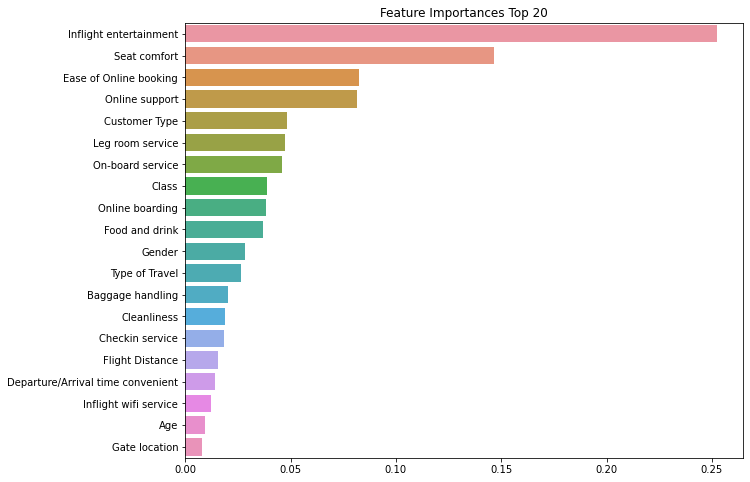

In [177]:
plt.figure(figsize=(10,8))
plt.title('Feature Importances Top 20')
sns.barplot(x = top20_imp, y= top20_imp.index)
